# KNN

## Generate dataset

We use `scikit-learn` to generate datasets with centers [0.5,0.5], [-0.5,-0.5] and cluster standard deviation of 0.4.

## Finding the neighbors

Distance can be thought of as a measure of similarity. Euclidean distance is the most commonly used but other distance metrics such as Manhattan work as well. The generalized distance metric is called the Minkowski distance, defined as,

$$ d=\bigg( \sum_{n=i}^n |x_i=y_i|^p \bigg)^{1/p} $$

where $x_i$ and $y_i$ are the two observations for which distance $d$ is being calculated with a hyperparameter, integer $p$.

When $p=1$, the Minkowski distance is the Manhattan distance and when $p=2$, the Minkowski distance is the just the standard Euclidean distance. With the $K$ neighbors identified using distance metrics, the algorithm can make a classification or prediction with the label values of the neighbors.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
X, y = make_blobs(n_samples=30, 
                  centers=[[0.5,0.5],[-0.5,-0.5]], 
                  cluster_std=0.4, 
                  random_state=110)

In [3]:
df = pd.DataFrame({'X1':X[:, 0], 
                   'X2':X[:, 1], 
                   'Y':y})

# specify the class
df['Class'] = df['Y'].apply(lambda x: 'Red' if x>0 else 'Blue')

### a)  Compute the Euclidean distance between each observations and the test points.

In [4]:
# calculate the distance of each row of X1 X2 to the point (0.25, 0.25)
euclidean_distances(df[['X1', 'X2']], [[0.25, 0.25]]).reshape(-1)

array([1.04733706, 0.8183411 , 0.93138861, 1.28750235, 1.02462777,
       0.85018765, 0.28648156, 0.89127618, 0.55455989, 0.27842884,
       0.70368494, 0.38753712, 0.84257862, 0.9471529 , 0.47235871,
       0.19098565, 0.95638954, 1.00819387, 1.3023314 , 1.3134449 ,
       0.3655316 , 1.17904817, 0.67913933, 1.02871351, 1.46123314,
       1.05268573, 0.51941787, 1.15065779, 0.91075985, 0.4731966 ])

In [5]:
edist = pd.Series(euclidean_distances(df[['X1', 'X2']], 
                                      [[0.25, 0.25]]).reshape(-1), 
                  name='Euclidean') 

df = pd.concat([df, edist], axis=1) 
df.head()

,X1,X2,Y,Class,Euclidean
0,-0.621282,-0.331191,1,Red,1.047337
1,0.410545,-0.552438,0,Blue,0.818341
2,-0.046838,-0.632821,1,Red,0.931389
3,-0.455832,-0.826784,1,Red,1.287502
4,-0.087054,1.217604,0,Blue,1.024628


### b) What is the class prediction with K = 1?

In [6]:
df.nsmallest(1,'Euclidean')

,X1,X2,Y,Class,Euclidean
15,0.434864,0.202033,0,Blue,0.190986


### c) What is the class prediction with K = 5?

In [7]:
df.nsmallest(5,'Euclidean')

,X1,X2,Y,Class,Euclidean
15,0.434864,0.202033,0,Blue,0.190986
9,0.152672,0.510864,0,Blue,0.278429
6,0.518747,0.349231,0,Blue,0.286482
20,-0.107496,0.173775,0,Blue,0.365532
11,0.631439,0.181521,0,Blue,0.387537


### d) Draw decision doundary with K=5.

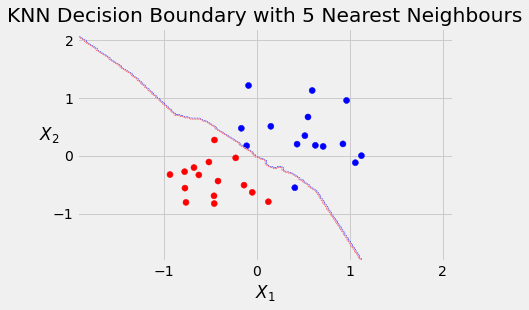

In [8]:
def plot_boundary(x, y, k):

    # Instantiate the model object 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fits the model 
    knn.fit(x, y)

    # Step size of the mesh 
    h = .02

    # Plot the decision boundary.

    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1 
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    # Create Meshgrid 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict labels for each point in mesh 
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape to match dimensions 
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.contour(xx, yy, Z, cmap=plt.cm.bwr, linestyles = 'dashed', linewidths=0.5) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr) 
    plt.title(f'KNN Decision Boundary with {k} Nearest Neighbours') 
    plt.xlabel('$X_1$') 
    plt.ylabel('$X_2$', rotation='horizontal') 
    plt.show()
    
    
# Plot KNN decision boundary with K=5 
plot_boundary(X, y, 5)

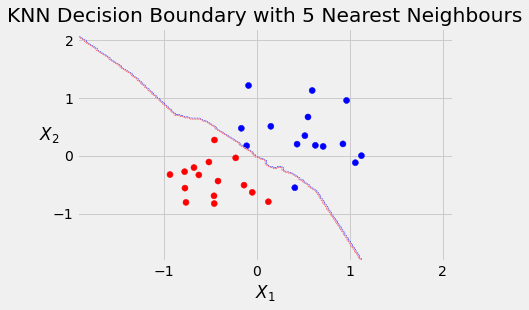

In [9]:
x = X.copy()
k = 5

# Instantiate the model object 
knn = KNeighborsClassifier(n_neighbors=k)

# Fits the model 
knn.fit(X, y)

# Step length of the meshgrid
h = .02

# Plot the decision boundary.

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1 
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

# Create Meshgrid 
# xx remains the same, but yy growth at the step length `h`
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict labels for each point in mesh 
# use the knn model trained by X, y to draw a 
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape to match dimensions 
Z = Z.reshape(xx.shape)

# Plotting
plt.contour(xx, yy, Z, cmap=plt.cm.bwr, linestyles = 'dashed', linewidths=0.5) 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr) 
plt.title(f'KNN Decision Boundary with {k} Nearest Neighbours') 
plt.xlabel('$X_1$') 
plt.ylabel('$X_2$', rotation='horizontal') 
plt.show()

# GridSearch

The conventional way of performing **Hyperparameter Optimisation** has been a grid search (aka parameter sweep). It is an exhaustive search through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a validation set.

GridSearch performs exhaustive search over specified parameter values for an estimator. It implements a “fit” and a “score” method among other methods. The parameters of the estimator used to apply these methods are optimised by cross-validated grid-search over a parameter grid.

In [10]:
# Import Library 
import io 
import requests

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV, cross_val_score

In [11]:
df = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
df

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [12]:
features = df.drop('admit', axis=1) 
target = df['admit']

features

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4
...,...,...,...
395,620,4.00,2
396,560,3.04,3
397,460,2.63,2
398,700,3.65,2


In [13]:
# convert to np.array
X = features.values 
y = target.values

In [14]:
# Scale and fit the model 
pipe = Pipeline([("scaler", StandardScaler()), 
                 ("logistic", LogisticRegression(solver='liblinear'))]) 

pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(solver='liblinear'))])

## a) List of all tunable hyper-parameters

In [15]:
# get model params 
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(solver='liblinear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(solver='liblinear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'liblinear',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

## b) Select the best model by searching over a range of hyperparameters based on cross validation score using an Exhaustive Search.

In [16]:
# penalty hyperparamter values 
penalty = ['l1', 'l2'] 

# regularization hyperparamter 
C = np.linspace(0.01,10,10) 
C 

# subsume into one dict 
param_grid = dict(logistic__C=C, logistic__penalty=penalty)

In [17]:
%%time
# create a grid search with cv=5 
gridsearch = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, verbose=1) 

# fit grid search 
best_model = gridsearch.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 185 ms, sys: 99 ms, total: 284 ms
Wall time: 3.61 s


In [18]:
# best model parameters 
best_model.best_params_

{'logistic__C': 2.23, 'logistic__penalty': 'l2'}

In [19]:
# best score 
best_model.best_score_

0.7075000000000001

In [20]:
pipe['logistic'].coef_

array([[ 0.26139396,  0.29067213, -0.51864053]])

In [21]:
best_model.best_estimator_.named_steps

{'scaler': StandardScaler(),
 'logistic': LogisticRegression(C=2.23, solver='liblinear')}

In [22]:
best_model.best_estimator_.named_steps['logistic'].coef_

array([[ 0.26317473,  0.29320696, -0.52387746]])

In [23]:
best_model.best_estimator_.named_steps['logistic'].intercept_

array([-0.85285979])

In [24]:
# best model params after hypertuning 
best_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(solver='liblinear'))],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__logistic': LogisticRegression(solver='liblinear'),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__logistic__C': 1.0,
 'estimator__logistic__class_weight': None,
 'estimator__logistic__dual': False,
 'estimator__logistic__fit_intercept': True,
 'estimator__logistic__intercept_scaling': 1,
 'estimator__logistic__l1_ratio': None,
 'estimator__logistic__max_iter': 100,
 'estimator__logistic__multi_class': 'auto',
 'estimator__logistic__n_jobs': None,
 'estimator__logistic__penalty': 'l2',
 'estimator__logistic__random_state': None,
 'estimator__logistic__solver': 'liblinear',
 'estimator__logistic__tol': 0.0001,
 'estimator__logistic__verbose': 0,
 'estimator__logisti

In [25]:
# cross validation results 
df1 = pd.DataFrame(best_model.cv_results_) 

df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002654,0.000313,0.000865,0.000307,0.01,l1,"{'logistic__C': 0.01, 'logistic__penalty': 'l1'}",0.6875,0.6875,0.6875,0.6750,0.6750,0.6825,0.006124,20
1,0.002986,0.001378,0.000665,0.000139,0.01,l2,"{'logistic__C': 0.01, 'logistic__penalty': 'l2'}",0.7125,0.7500,0.7000,0.6875,0.6875,0.7075,0.023184,14
2,0.002585,0.000577,0.000765,0.000301,1.12,l1,"{'logistic__C': 1.12, 'logistic__penalty': 'l1'}",0.7125,0.7375,0.7000,0.6875,0.6875,0.7050,0.018708,16
3,0.005253,0.003479,0.000805,0.000110,1.12,l2,"{'logistic__C': 1.12, 'logistic__penalty': 'l2'}",0.7125,0.7375,0.7000,0.6875,0.6875,0.7050,0.018708,16
4,0.003987,0.001232,0.000862,0.000273,2.23,l1,"{'logistic__C': 2.23, 'logistic__penalty': 'l1'}",0.7125,0.7500,0.7000,0.6875,0.6875,0.7075,0.023184,14
5,0.002254,0.000254,0.000680,0.000107,2.23,l2,"{'logistic__C': 2.23, 'logistic__penalty': 'l2'}",0.7125,0.7375,0.7000,0.6875,0.7000,0.7075,0.016956,1
6,0.003103,0.001160,0.000839,0.000199,3.34,l1,"{'logistic__C': 3.34, 'logistic__penalty': 'l1'}",0.7125,0.7375,0.7000,0.6875,0.6875,0.7050,0.018708,16
7,0.002999,0.002048,0.000646,0.000022,3.34,l2,"{'logistic__C': 3.34, 'logistic__penalty': 'l2'}",0.7125,0.7375,0.7000,0.6875,0.7000,0.7075,0.016956,1
8,0.002872,0.000946,0.000687,0.000111,4.45,l1,"{'logistic__C': 4.45, 'logistic__penalty': 'l1'}",0.7125,0.7375,0.7000,0.6875,0.6875,0.7050,0.018708,16
9,0.001986,0.000129,0.000612,0.000115,4.45,l2,"{'logistic__C': 4.45, 'logistic__penalty': 'l2'}",0.7125,0.7375,0.7000,0.6875,0.7000,0.7075,0.016956,1


For a combination of C and penality values, we have created 10 x 2 x 5 = 100 model candidates from which the best model was selected. On the basis of above cross validation results, we then choose the model that ranked number one.

In [26]:
# Model Params 
print(f"Best Penalty: {best_model.best_params_['logistic__penalty']}") 
print(f"Best C: {best_model.best_params_['logistic__C']}") 
print(f"Best Score: {best_model.best_score_:.04}")

Best Penalty: l2
Best C: 2.23
Best Score: 0.7075
